<a href="https://colab.research.google.com/github/ayrtonddr/DS_taller/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadistica Descriptiva y Limpieza de Datos

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import numpy as np

In [19]:
data = pd.read_csv('sample_data.csv')

##Set de Datos


1.   Sexo (m-mujer/h-hombre)
2.   Ejercicio (si/no)
3.   Periodicidad (Diario/Semanal 2 a 3 veces por semana/ Mensual 2 a 3 veces por mes)
4.   Peso
5.   Edad




In [4]:
data.head()

,Sexo,Ejercicio,Periodicidad,Peso,Edad
0,m,Si,Diario,34.50,30
1,m,No,NaN,51.75,45
2,m,Si,Mensual,23.00,20
3,m,Si,Diario,20.70,18
4,h,Si,Diario,41.40,36


In [5]:
data.describe()

,Peso,Edad
count,54.000000,54.000000
mean,38.184259,33.203704
std,16.216407,14.101224
min,16.100000,14.000000
25%,24.437500,21.250000
50%,36.800000,32.000000
75%,49.450000,43.000000
max,85.100000,74.000000


Text(0.5, 1.0, 'Distribucion por peso y por edad')

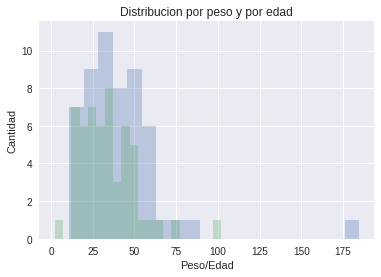

In [20]:
kwargs = dict(alpha=0.3,bins=20)
plt.hist(data['Peso'],**kwargs)
plt.hist(data['Edad'],**kwargs)
plt.xlabel('Peso/Edad')
plt.ylabel('Cantidad')
plt.title('Distribucion por peso y por edad')

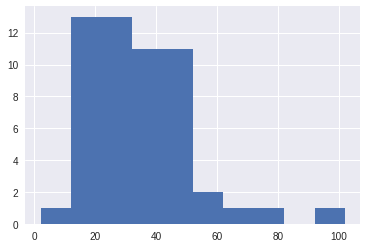

In [21]:
data['Edad'].hist()

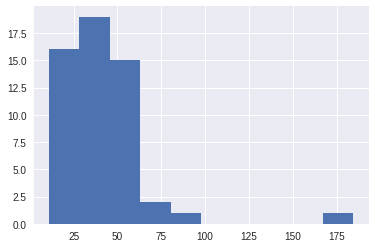

In [22]:
data['Peso'].hist()

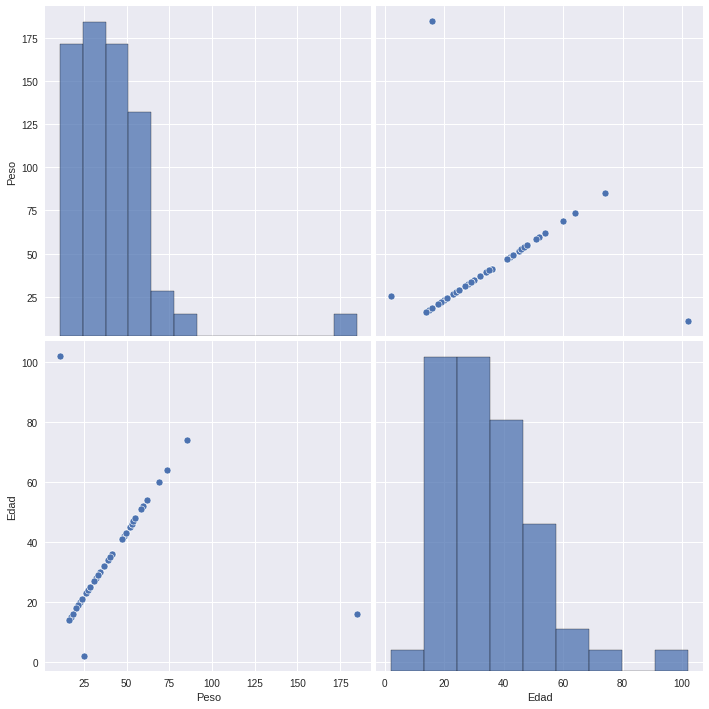

In [25]:
sns.pairplot(data,height=5)

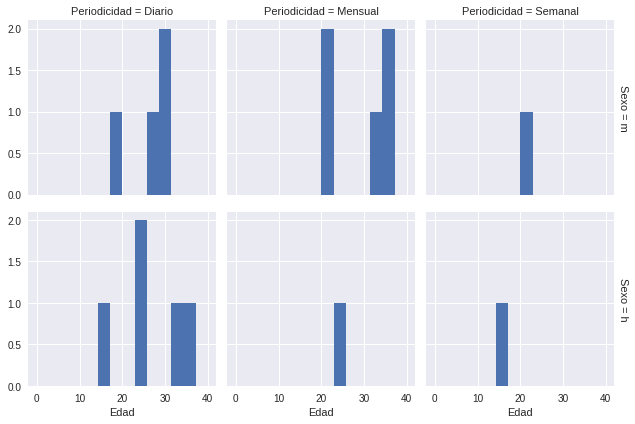

In [26]:
grid = sns.FacetGrid(data,row='Sexo',col='Periodicidad',margin_titles=True)
grid.map(plt.hist,'Edad',bins=np.linspace(0,40,15));

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sexo'] = label_encoder.fit_transform(data['Sexo'])
data['Ejercicio'] = label_encoder.fit_transform(data['Ejercicio'])

In [60]:
OH_data = data.copy()

In [66]:
OH_data['Periodicidad'] = OH_data['Periodicidad'].fillna(0)

In [68]:
OH_data.head()

,Sexo,Ejercicio,Periodicidad,Peso,Edad,Diario,Mensual,Semanal
0,1,1,Diario,34.50,30.0,1,0,0
1,1,0,0,51.75,45.0,0,0,0
2,1,1,Mensual,23.00,20.0,0,1,0
3,1,1,Diario,20.70,18.0,1,0,0
4,0,1,Diario,41.40,36.0,1,0,0


In [8]:
from sklearn.preprocessing import OneHotEncoder

In [1]:
#OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#OH = pd.DataFrame(OH_encoder.fit_transform(OH_data.Periodicidad.values.reshape(-1,1)))

In [28]:
periodicidad = pd.get_dummies(data['Periodicidad'])

In [29]:
periodicidad.head()

,Diario,Mensual,Semanal
0,1,0,0
1,0,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [30]:
data = pd.concat([data,periodicidad],axis=1)

In [31]:
data.head()

,Sexo,Ejercicio,Periodicidad,Peso,Edad,Diario,Mensual,Semanal
0,1,1,Diario,34.50,30.0,1,0,0
1,1,0,NaN,51.75,45.0,0,0,0
2,1,1,Mensual,23.00,20.0,0,1,0
3,1,1,Diario,20.70,18.0,1,0,0
4,0,1,Diario,41.40,36.0,1,0,0


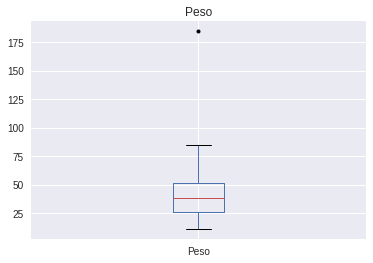

In [32]:
#Box Plot
plt.title('Peso')
#The sym 'k.' is just the figure to show the outliers.
data.boxplot(column="Peso",  sym='k.')

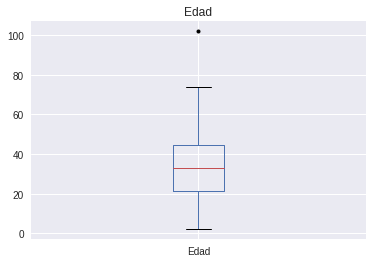

In [33]:
#Box Plot
plt.title('Edad')
#The sym 'k.' is just the figure to show the outliers.
data.boxplot(column="Edad",  sym='k.')

In [34]:
data_clean = data.copy()

In [41]:
sd = data_clean["Peso"].std()
mean = data_clean["Peso"].mean()
edad_st = data_clean["Edad"].std()
edad_mean =data_clean["Edad"].mean()
data_clean = data_clean[data_clean["Peso"] < (mean + (3 * sd))]
data_clean = data_clean[data_clean["Peso"] > (mean - (3 * sd))]
data_clean = data_clean[data_clean["Edad"] < (edad_mean + (3 * edad_st))]
data_clean = data_clean[data_clean["Edad"] > (edad_mean - (3 * edad_st))]

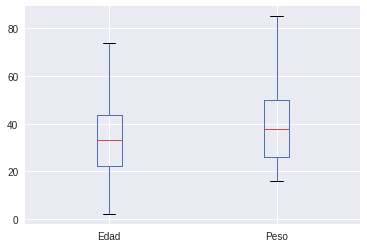

In [44]:
data_clean.boxplot(column=["Edad","Peso"],  sym='k.')

In [45]:
df_clean = data.copy()

In [48]:
Q1 = df_clean['Edad'].quantile(0.25)
Q3 = df_clean['Edad'].quantile(0.75)

In [52]:
Q1_peso = df_clean['Peso'].quantile(0.25)
Q3_peso= df_clean['Peso'].quantile(0.75)

In [49]:
RIC = Q3 - Q1
LI = Q1 - (1.5*RIC)
LS = Q3 + (1.5*RIC)

In [53]:
RIC_peso = Q3_peso - Q1_peso
LI_peso = Q1_peso - (1.5*RIC_peso)
LS_peso = Q3_peso + (1.5*RIC_peso)

In [50]:
df_clean['Edad'] = df_clean['Edad'].apply(lambda x: x if(x <= LS and x >= LI) else np.nan)

In [54]:
df_clean['Peso'] = df_clean['Peso'].apply(lambda x: x if(x <= LS and x >= LI) else np.nan)

In [56]:
df_clean = df_clean.dropna()

In [57]:
df_clean.describe()

,Sexo,Ejercicio,Peso,Edad,Diario,Mensual,Semanal
count,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.518519,1.0,40.037037,34.814815,0.481481,0.481481,0.037037
std,0.509175,0.0,13.858985,12.051291,0.509175,0.509175,0.192450
min,0.000000,1.0,17.250000,15.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,28.750000,25.000000,0.000000,0.000000,0.000000
50%,1.000000,1.0,40.250000,35.000000,0.000000,0.000000,0.000000
75%,1.000000,1.0,49.450000,43.000000,1.000000,1.000000,0.000000
max,1.000000,1.0,73.600000,64.000000,1.000000,1.000000,1.000000


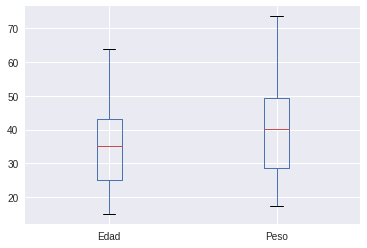

In [59]:
df_clean.boxplot(column=["Edad","Peso"],  sym='k.')

# Regresión Lineal

In [1]:
from sklearn import datasets

data = datasets.load_boston()

In [2]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# Set the features  
df = pd.DataFrame(data.data, columns=data.feature_names)
# Set the target
target = pd.DataFrame(data.target, columns=["MEDV"])

In [4]:
df_all = df.copy()
df_all['MEDV'] = target.copy()

In [5]:
df_all.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df_all.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df_all.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [8]:
#Dividiendo el conjunto de datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test=train_test_split(df,target, test_size=0.3,random_state=1)
print('Muestras de entrenamiento: ', X_train.shape)
print('Muestras de prueba: ', X_test.shape)

Muestras de entrenamiento:  (354, 13)
Muestras de prueba:  (152, 13)


In [37]:
#Numero de cuartos (average number of rooms per dwelling)
X = X_train['RM'].values.reshape(-1,1)
#X = X_train[['RM','AGE']]
#X = X_train[['RM','PTRATIO','LSTAT']]
#Costo de la casa (Median value of owner-occupied homes in $1000's)


lm = linear_model.LinearRegression()
model = lm.fit(X,y_train)

In [38]:
predictions = lm.predict(X_test['RM'].values.reshape(-1,1))
#predictions = lm.predict(X_test[['RM','AGE']])
#predictions = lm.predict(X_test[['RM','PTRATIO','LSTAT']])
print(predictions[0:5])

[[27.37898421]
 [26.08443719]
 [20.44935016]
 [19.16326423]
 [14.79734095]]


In [39]:
#lm.score(X_test[['RM','AGE']],y_test)
lm.score(X_test['RM'].values.reshape(-1,1),y_test)
#lm.score(X_test[['RM','PTRATIO','LSTAT']],y_test)

0.6015774471545622

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


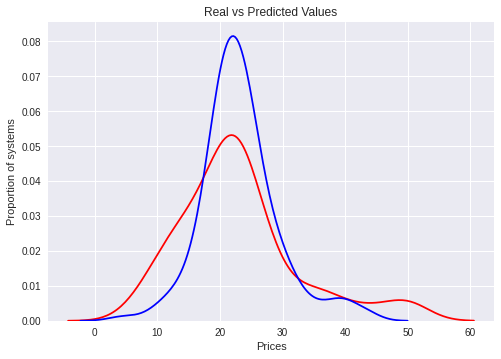

In [43]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Real Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Real vs Predicted Values')
plt.xlabel('Prices')
plt.ylabel('Proportion of systems')

plt.show()
plt.close()

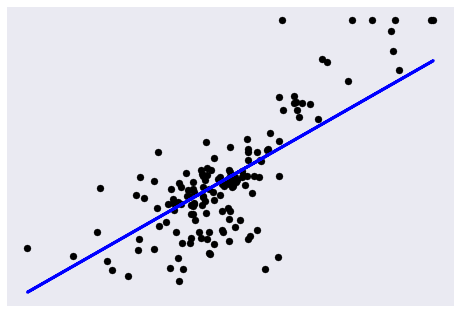

In [44]:
plt.scatter(X_test['RM'], y_test,  color='black')
plt.plot(X_test['RM'], predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()